# Algorytm k najbliższych sąsiadów (KNN)


## Kroki algorytmu
1. Obliczenie odległości między elementem testowym a wszystkimi elementami zbioru treningowego.
2. Wyznaczenie k (ustalone z góry) elementów o najmniejszej odległości od elementu testowego.
3. Dla wyznaczenia predykcji: w przypadku problemu klasyfikacji wybranie etykiety najczęściej występującej wśród wybranych k elementów, natomiast w przypadku problemu regresji obliczenie średniej wartości z wybranych k elementów.
![knn.png](assets/knn.png)

In [1]:
# Wczytanie bibliotek
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors
from sklearn.metrics import accuracy_score, mean_squared_error
mpl.rcParams['figure.dpi']= 100

## Przykład 1 (klasyfikacja)
- **Dane:** klasyczny zbiór danych na temat irysów (ang. Iris flower data set)
- **Cel:** dopasowanie właściwego gatunku irysa (trzy do wyboru) na podstawie długości płatka (ang. petal) i długości dzbanka kielicha (ang. sepal)
![iris.png](assets/iris.png)

In [2]:
# Wczytanie danych
iris = pd.read_csv("assets/iris.csv")
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


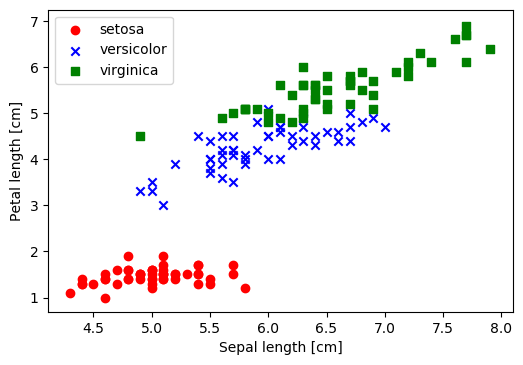

In [3]:
# Przygotowanie danych i ich wizualizacja
X = iris.iloc[:, [0, 2]].values
y = iris.iloc[:, 4].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='s', label='virginica')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

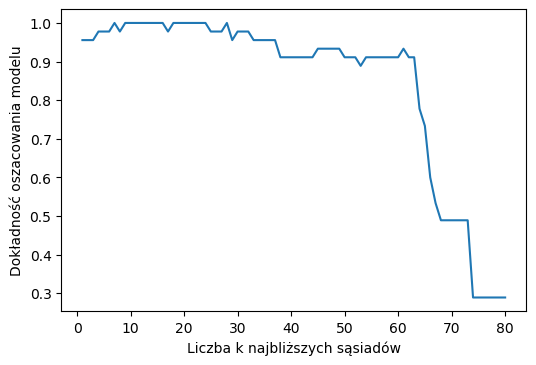

In [4]:
# Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

# Dopasowanie modelu i oszacowanie dokładności dla różnych wartości k w metodzie KNN
models = 80
errors = []
for i in range(models):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i+1)
    model.fit(X_train, y_train)
    errors.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(list(range(1, models+1)), errors)
plt.xlabel('Liczba k najbliższych sąsiadów')
plt.ylabel('Dokładność oszacowania modelu')
plt.show()

### Porównanie wyników predykcji dla różnych wartości k (ciemniejszymi kolorami oznaczone są elementy zbioru treningowego):
![k_comparison.png](assets/k_comparison.png)

## Przykład 2 (regresja)
- **Dane:** poziom satysfakcji z życia i PKB per capita w wybranych krajach na świecie w 2015 r. (źródła: OECD Better Life Index, International Monetary Fund)
- **Cel:** oszacowanie poziomu satysfakcji z życia na podstawie PKB per capita

In [5]:
# Wczytanie danych
country_stats = pd.read_csv("assets/country_stats.csv")
country_stats.tail()

,Country,GDP per capita,Life satisfaction
24,Iceland,50854.583,7.5
25,Australia,50961.865,7.3
26,Ireland,51350.744,7.0
27,Denmark,52114.165,7.5
28,United States,55805.204,7.2


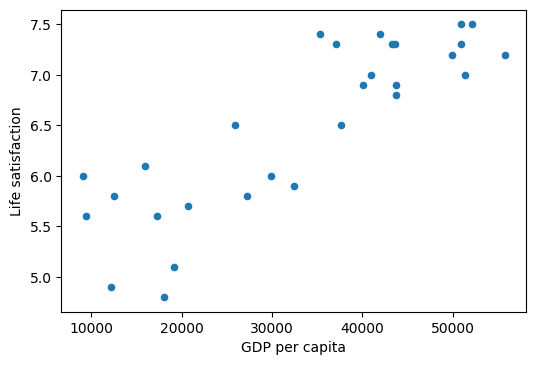

In [6]:
# Przygotowanie danych i ich wizualizacja
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
country_stats.plot(kind = 'scatter', x = "GDP per capita", y = 'Life satisfaction')
plt.show()

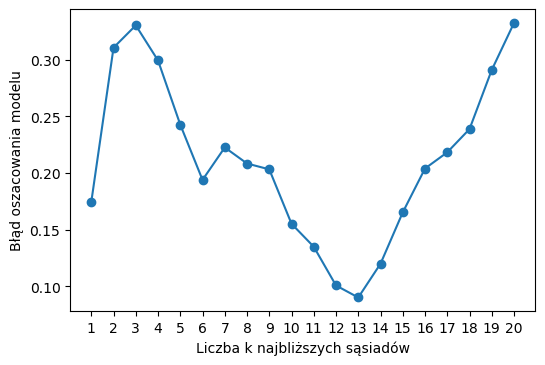

In [7]:
# Podział zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

# Dopasowanie modelu i oszacowanie błędu dla różnych wartości k w metodzie KNN
models = 20
errors = []
for i in range(models):
    model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = i+1)
    model.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(list(range(1, models+1)), errors, marker = 'o')
plt.xlabel('Liczba k najbliższych sąsiadów')
plt.ylabel('Błąd oszacowania modelu')
plt.xticks(range(1, models+1))
plt.show()

## Literatura
1. Bishop, C. - Pattern Recognition and Machine Learning
2. Géron, A. - Hands-on Machine Learning with Scikit-Learn and TensorFlow
3. Pärna, K. - Kangro, R.; Kaasik, A.; Möls, M. - K-nearest neighbors as pricing tool in insurance: a comparative study
4. Spedicato, G., Dutang, C., Petrini, L. - Machine Learning Methods to Perform Pricing Optimization. A Comparison with Standard GLMs.